In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('wine-2.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
X = df.drop('Type', axis=1)
y = df['Type']

## FEATURE ENGINEERING

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
le.fit(y) # fit the encoder
y = le.transform(y) # transform the labels

In [14]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Min-max scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting a support vector classifier

In [16]:
param_grid_svc = [{
    'C': [0.01, 0.1, 1, 10,],
    'kernel': ['linear']
    }]

svcClassifier = GridSearchCV(
    SVC(probability=True), 
    param_grid_svc, 
    cv=5, 
    scoring='accuracy')
svcClassifier.fit(X_train_scaled, y_train)

print("Best parameters set found on development set:")
print()
print(svcClassifier.best_params_)
print()
print("Grid scores on development set:")
print()
means = svcClassifier.cv_results_["mean_test_score"]
stds = svcClassifier.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, svcClassifier.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.571 (+/-0.022) for {'C': 0.01, 'kernel': 'linear'}
0.946 (+/-0.033) for {'C': 0.1, 'kernel': 'linear'}
0.989 (+/-0.021) for {'C': 1, 'kernel': 'linear'}
0.979 (+/-0.042) for {'C': 10, 'kernel': 'linear'}


In [17]:
y_pred_svc = svcClassifier.predict(X_test_scaled)
y_true, y_pred = y_test, y_pred_svc
print(classification_report(y_true, y_pred_svc))
sum(y_pred_svc==y_test)/len(y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.95      0.97        19

    accuracy                           0.97        39
   macro avg       0.98      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39



0.9743589743589743

# Fitting a support vector machine with a radial kernel

In [18]:
param_grid_svm_r = [{
    'C': [0.01, 0.1, 1, 10,],
    'kernel': ['rbf']
    }]

svm_rClassifier = GridSearchCV(
    SVC(probability=True), 
    param_grid_svm_r, 
    cv=5, 
    scoring='accuracy')
svm_rClassifier.fit(X_train_scaled, y_train)
print("Best parameters set found on development set:")
print()
print(svm_rClassifier.best_params_)
print()
print("Grid scores on development set:")
print()
means = svm_rClassifier.cv_results_["mean_test_score"]
stds = svm_rClassifier.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, svm_rClassifier.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

Best parameters set found on development set:

{'C': 1, 'kernel': 'rbf'}

Grid scores on development set:

0.571 (+/-0.022) for {'C': 0.01, 'kernel': 'rbf'}
0.967 (+/-0.027) for {'C': 0.1, 'kernel': 'rbf'}
0.989 (+/-0.021) for {'C': 1, 'kernel': 'rbf'}
0.989 (+/-0.021) for {'C': 10, 'kernel': 'rbf'}


In [19]:
y_pred_svm_r = svm_rClassifier.predict(X_test_scaled)
y_true, y_pred = y_test, y_pred_svm_r
print(classification_report(y_true, y_pred_svm_r))
sum(y_pred_svm_r==y_test)/len(y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        19

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



1.0

# Fitting a support vector machine with a polynomial kernel

In [20]:
param_grid_svm_p = [{
    'C': [0.01, 0.1, 1, 10,],
    'kernel': ['poly'],
    'degree': [2]
    }]

svm_pClassifier = GridSearchCV(
    SVC(probability=True), 
    param_grid_svm_p, 
    cv=5, 
    scoring='accuracy')
svm_pClassifier.fit(X_train_scaled, y_train)
print("Best parameters set found on development set:")
print()
print(svm_pClassifier.best_params_)
print()
print("Grid scores on development set:")
print()
means = svm_pClassifier.cv_results_["mean_test_score"]
stds = svm_pClassifier.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, svm_pClassifier.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

Best parameters set found on development set:

{'C': 0.1, 'degree': 2, 'kernel': 'poly'}

Grid scores on development set:

0.934 (+/-0.023) for {'C': 0.01, 'degree': 2, 'kernel': 'poly'}
0.989 (+/-0.021) for {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
0.979 (+/-0.042) for {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.979 (+/-0.042) for {'C': 10, 'degree': 2, 'kernel': 'poly'}


In [21]:
y_pred_svm_p = svm_pClassifier.predict(X_test_scaled)
y_true, y_pred = y_test, y_pred_svm_p
print(classification_report(y_true, y_pred_svm_p))
sum(y_pred_svm_p==y_test)/len(y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.95      0.97        19

    accuracy                           0.97        39
   macro avg       0.98      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39



0.9743589743589743

In [22]:
svc_probs = svcClassifier.predict_proba(X_test_scaled)
svc_probs = svc_probs[:, 1]

svm_r_probs = svm_rClassifier.predict_proba(X_test_scaled)
svm_r_probs = svm_r_probs[:, 1]

svm_p_probs = svm_pClassifier.predict_proba(X_test_scaled)
svm_p_probs = svm_p_probs[:, 1]

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
svc_auc = roc_auc_score(y_test, svc_probs)
svm_r_auc = roc_auc_score(y_test, svm_r_probs)
svm_p_auc = roc_auc_score(y_test, svm_p_probs)

## Calculating the AUROC 

In [24]:
print("Support Vector Machine: AUROC = %3f" %(svc_auc))
print("Support Vector Machine with RBF Kernel: AUROC = %3f" %(svm_r_auc))
print("Support Vector Machine with Polynomial Kernel: AUROC = %3f" %(svm_p_auc))

Support Vector Machine: AUROC = 1.000000
Support Vector Machine with RBF Kernel: AUROC = 1.000000
Support Vector Machine with Polynomial Kernel: AUROC = 1.000000


In [25]:
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
svm_r_fpr, svm_r_tpr, _ = roc_curve(y_test, svm_r_probs)
svm_p_fpr, svm_p_tpr, _ = roc_curve(y_test, svm_p_probs)

## Plotting the three ROC curves for test predictions

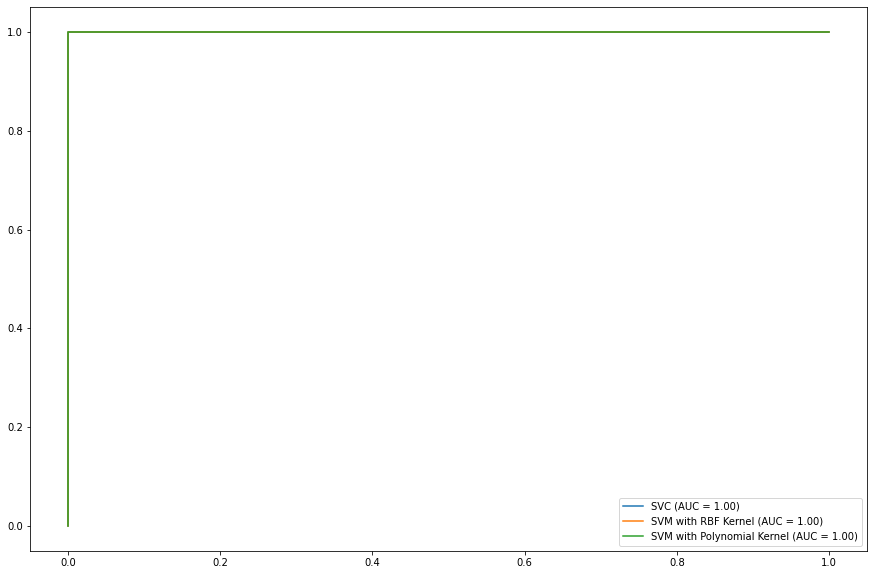

In [26]:
plt.figure(figsize=(15,10))
plt.plot(svc_fpr, svc_tpr, label='SVC (AUC = %0.2f)' % svc_auc)
plt.plot(svm_r_fpr, svm_r_tpr, label='SVM with RBF Kernel (AUC = %0.2f)' % svm_r_auc)
plt.plot(svm_p_fpr, svm_p_tpr, label='SVM with Polynomial Kernel (AUC = %0.2f)' % svm_p_auc)

plt.legend()
plt.show()

## Decision tree classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

## Finding the best parameters for the decision tree model

In [28]:
param_grid_dt = [{
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'criterion': ['gini', 'entropy']
    }]
    
dtClassifier = GridSearchCV( 
    DecisionTreeClassifier(),
    param_grid_dt,
    cv=5,
    scoring='accuracy')
dtClassifier.fit(X_train_scaled, y_train)
print("Best parameters set found on development set:")
print()
print(dtClassifier.best_params_)
print()
print("Grid scores on development set:")
print()
means = dtClassifier.cv_results_["mean_test_score"]
stds = dtClassifier.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, dtClassifier.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 12}

Grid scores on development set:

0.956 (+/-0.041) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
0.956 (+/-0.054) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 3}
0.956 (+/-0.041) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 4}
0.967 (+/-0.044) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 5}
0.967 (+/-0.044) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 6}
0.946 (+/-0.048) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 7}
0.967 (+/-0.044) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 8}
0.946 (+/-0.068) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 9}
0.946 (+/-0.048) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 10}
0.967 (+/-0.044) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 11}
0.978 (+/-0.044) for {'c

In [29]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, min_samples_split = 13) 
# here ccp_alpha is the complexity parameter. you can tune it by cross-validation as in knn and svm. here I use 
# a fixed value for illustration
# evaluate model performance by cross-validation
scores_dt = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(scores_dt)
scores_dt.mean()

[0.84210526 0.88888889 1.         1.         0.88888889]


0.9239766081871345

## Plotting the pruned tree

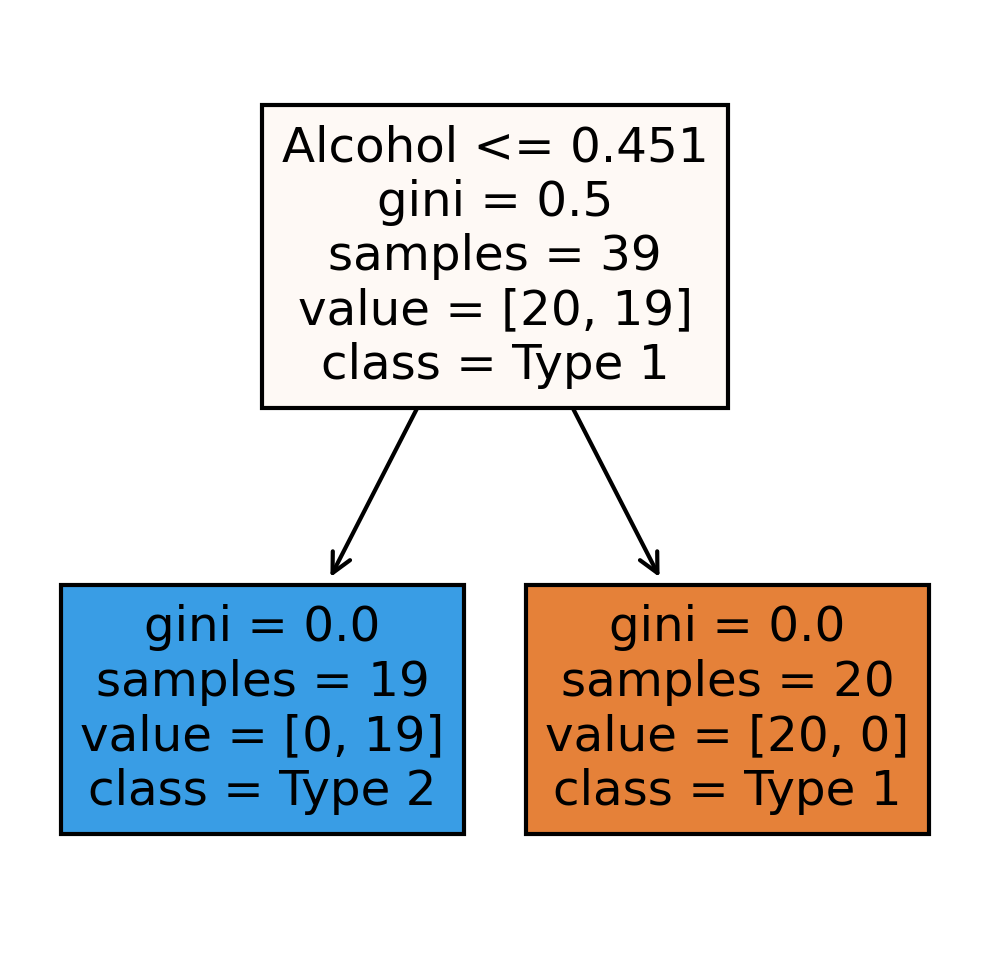

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree
# visualise tree
dt_vis=dt.fit(X_test_scaled,y_test)
fn = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline']
cn = ['Type 1', 'Type 2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_vis,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Random Forest Classifier

## Finding the best parameters based on max features

In [31]:
param_grid_rf = [{
    'max_features': [1,2,3,4,5,6]
    }]

rfClassifier = GridSearchCV( 
    RandomForestClassifier(),
    param_grid_rf,
    cv=5,
    scoring='accuracy')
rfClassifier.fit(X_train_scaled, y_train)
print("Best parameters set found on development set:")
print()
print(rfClassifier.best_params_)
print()
print("Grid scores on development set:")
print()
means = rfClassifier.cv_results_["mean_test_score"]
stds = rfClassifier.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, rfClassifier.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

Best parameters set found on development set:

{'max_features': 1}

Grid scores on development set:

0.989 (+/-0.021) for {'max_features': 1}
0.968 (+/-0.042) for {'max_features': 2}
0.989 (+/-0.021) for {'max_features': 3}
0.978 (+/-0.027) for {'max_features': 4}
0.967 (+/-0.027) for {'max_features': 5}
0.957 (+/-0.040) for {'max_features': 6}


In [32]:
rf = RandomForestClassifier(max_features = 2)

scores_rf = cross_val_score(rf, X_test_scaled, y_test, cv=5, scoring='accuracy')
print(scores_rf)
scores_rf.mean()

[1.    1.    0.875 1.    1.   ]


0.975

## Plotting the variable importance

[0.25281506 0.03745626 0.04692723 0.03217103 0.03468088 0.10650642
 0.11203486 0.02448156 0.02043547 0.11727641 0.02557419 0.03168156
 0.15795908]
[0.39377663 0.1268718  0.13685319 0.10760533 0.1158416  0.21431392
 0.23752598 0.08651566 0.06673924 0.27333745 0.06432021 0.0884977
 0.2730738 ]

Alcohol            0.252815
Malic              0.037456
Ash                0.046927
Alcalinity         0.032171
Magnesium          0.034681
Phenols            0.106506
Flavanoids         0.112035
Nonflavanoids      0.024482
Proanthocyanins    0.020435
Color              0.117276
Hue                0.025574
Dilution           0.031682
Proline            0.157959
dtype: float64


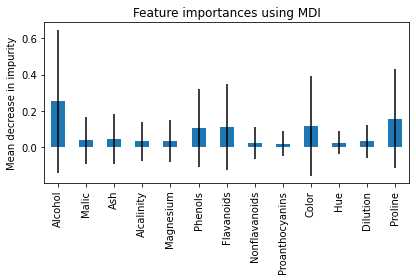

In [33]:
rf_var=rf.fit(X_test_scaled,y_test)
importances = rf_var.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_var.estimators_], axis=0)
print(importances)
print(std)
print()

forest_importances = pd.Series(importances, index=['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'])
print(forest_importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()